## FPUT (simple case)

Consider the hamiltonian (dimensionless) below
\begin{equation}
H(\vec{q},\vec{p})=\sum_{n=0}^{N-1}\Bigr[ \frac{p_n^2}{2}+\frac{(q_{n+1}-q_n)^2}{2}\Bigr]\\
\vec{q} = [q_1, \dots, q_n,\dots, q_N]\\
\vec{p} = [p_1, \dots, p_n, \dots,p_N]\\
\end{equation}

With the initial condition of the following form:\
\begin{equation}
q_n^{(t=0)}=Asin(\frac{\pi n}{N})\\p_n(0)=0
\end{equation}

<!-- The dependence between $q_n$ and $p_n$ are from the hamiltonian $H_n$ is
\begin{equation}
p_n = \sqrt{2E_n-k(q_{n+1}-q_n)^2}, \\
E_n=H_n, H = \sum_{n=0}^{N-1}H_n
\end{equation} -->

then, $\dot{q_n}$ and $\dot{p_n}$ would be

\begin{equation}
\dot{q_n}^{(t)}=\frac{\partial H}{\partial p_n}=p_n^{(t)}
\\
\dot{p_n}^{(t)}=-\frac{\partial H}{\partial q_n}=q_{n-1}^{(t)}+q_{n+1}^{(t)}-2q_n^{(t)}
\end{equation}



In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Initial variables
# Assumes that len(p)=len(q)>=3

M = 3 # total number of oscillators
# k = 0.5 # spring constant
A = 0.8 # amplitude
q = A*np.sin(np.linspace(0,np.pi,M)) # oscillator position
p = np.zeros(M) # oscillator momentum
t_a = 0.0 # start of the interval
t_b = 100.0 # end of the interval
N = 10000 # number of steps
dt = (t_b-t_a)/N # size of a single step

## Calculates p_dot according EOM
# Notice that in the simple case Hamiltonian, q_dot just equals to p
def p_dot_update(q):
    p_dot_tem = np.zeros(M)
    for i in range(M):
        if i==0: # left boundary case
            p_dot_tem[i]=q[i+1]-2*q[i]
        elif i==len(q)-1: # right boundary case
            p_dot_tem[i]=q[i-1]-2*q[i]
        else:
            p_dot_tem[i]=-2*q[i]+q[i-1]+q[i+1]
    return p_dot_tem

#### Important: Symplectic integrator or non-symplectic integrator?

For a **symplectic** Euler, it's calculated as the following:

\begin{equation}
q_n^{(t+dt)}=q_n^{(t)}+dt\cdot \dot{q_n}^{(t)}
\\
p_n^{(t+dt)}=p_n^{(t)}+dt\cdot \dot{p_n}^{(t+dt)}
\end{equation}

For a **non-symplectic** Euler,

\begin{equation}
q_n^{(t+dt)}=q_n^{(t)}+dt\cdot \dot{q_n}^{(t)}
\\
p_n^{(t+dt)}=p_n^{(t)}+dt\cdot \dot{p_n}^{(t)}
\end{equation}


<Figure size 640x480 with 0 Axes>

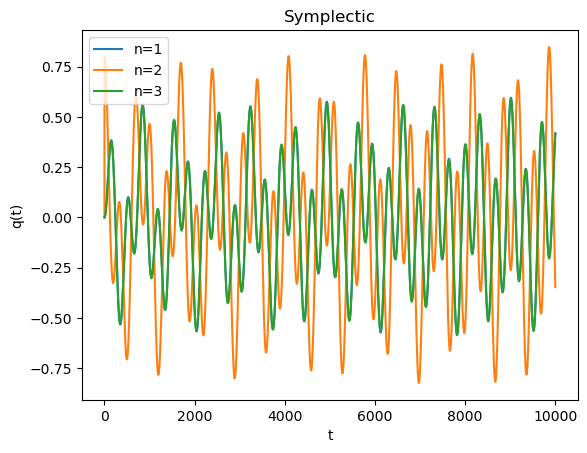

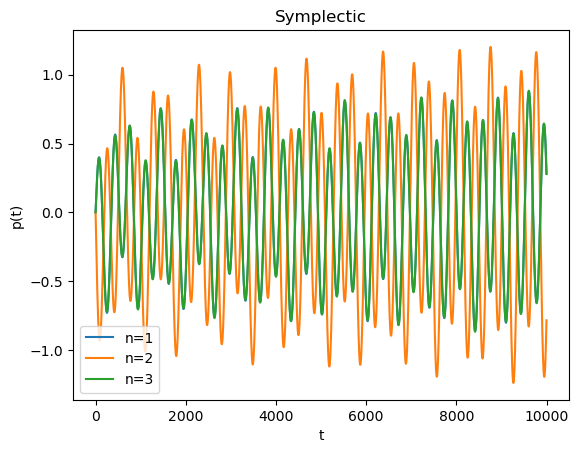

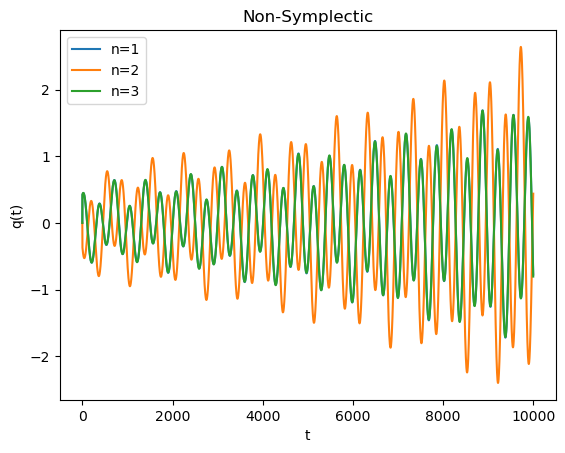

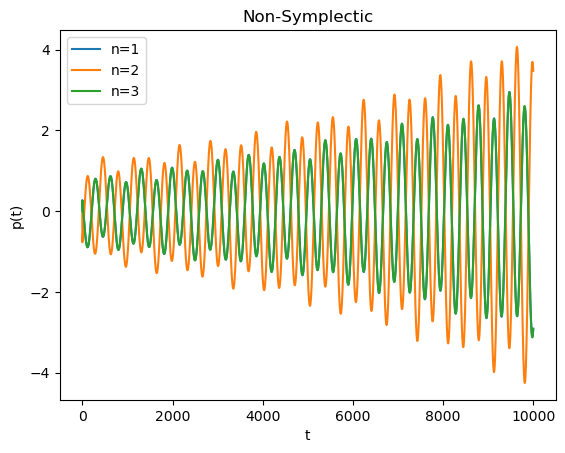

<Figure size 640x480 with 0 Axes>

In [19]:
## Euler Method

# Symplectic
def euler_evol_sym(q, p):
    q_dot = p # old q
    p_dot = np.zeros(M)
    p_dot = p_dot_update(q) # old p
    q_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's position
    p_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's momentum
    for t in range(1,N):
        for n in range(M):
            q[n] = q_dot[n]*dt + q[n] #first update p and q, then update p_dot and q_dot
            p_dot = p_dot_update(q) 
            p[n] = p_dot[n]*dt + p[n]
            q_dot = p # In our case, q_dot just equals to p
        q_matrix[t:]=q
        p_matrix[t:]=p
    return q_matrix, p_matrix

def euler_evol_non_sym(q, p):
    q_dot = p # old q
    p_dot = np.zeros(M)
    p_dot = p_dot_update(q) # old p
    q_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's position
    p_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's momentum
    for t in range(1,N):
        for n in range(M):
            q[n] = q_dot[n]*dt + q[n]
            p[n] = p_dot[n]*dt + p[n]
            p_dot = p_dot_update(q) 
            q_dot = p # In our case, q_dot just equals to p
        q_matrix[t:]=q
        p_matrix[t:]=p
    return q_matrix, p_matrix

q_t_s, p_t_s = euler_evol_sym(q,p)
q_t_ns, p_t_ns = euler_evol_non_sym(q,p)
        
## Creating a label array for plotting
label_n = []
for i in range(M):
    label_n.append("n={number}".format(number=i+1))

q_plot = plt.plot(q_t_s)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend(q_plot,label_n)
plt.title("Symplectic")
plt.figure()

p_plot = plt.plot(p_t_s)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.legend(p_plot,label_n)
plt.title("Symplectic")
plt.figure()

q_plot = plt.plot(q_t_ns)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend(q_plot,label_n)
plt.title("Non-Symplectic")
plt.figure()

p_plot = plt.plot(p_t_ns)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.legend(p_plot,label_n)
plt.title("Non-Symplectic")
plt.figure()

<Figure size 640x480 with 0 Axes>

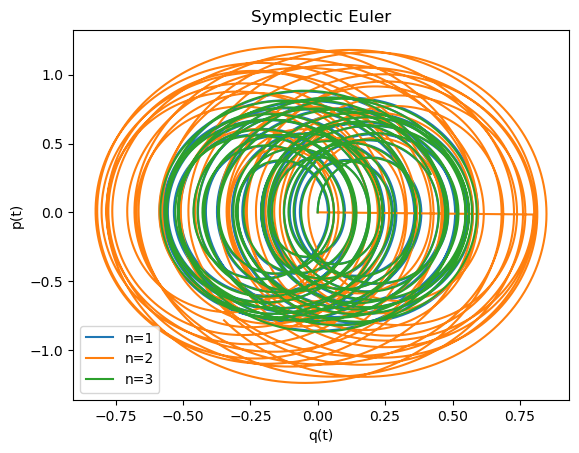

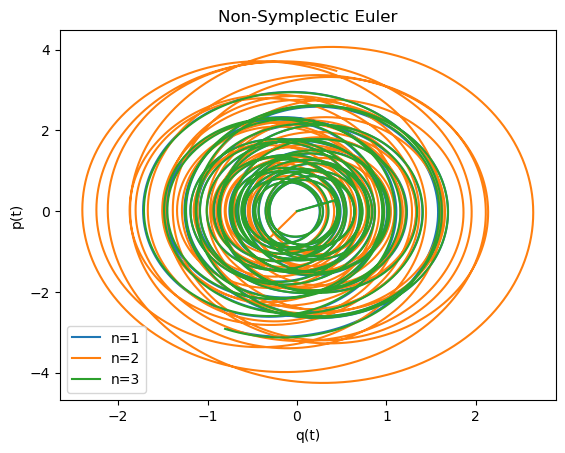

<Figure size 640x480 with 0 Axes>

In [20]:
## Phase diagram for Euler method

for n in range(M):
    label_n = "n={number}".format(number=n+1)
    plot_s = plt.plot(q_t_s[:,n],p_t_s[:,n], label=label_n)
    
plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.title("Symplectic Euler")
plt.legend()
plt.figure()

for n in range(M):
    label_n = "n={number}".format(number=n+1)
    plot_ns = plt.plot(q_t_ns[:,n],p_t_ns[:,n], label=label_n)

plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.title("Non-Symplectic Euler")
plt.legend()
plt.figure()


For Runge Kutta 4 method,$q_n$ and $p_n$ are calculated in the following way:<br>
At time $t$,<br>
##### First, calculate $k_{1q}^{(t)}, k_{1p}^{(t)}$:
\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t)}; (k_{1q}^{(t)})\\
\
\dot{p_n}^{(t)}=k(q_{n-1}^{(t)}+q_{n+1}^{(t)}-2q_{n}^{(t)}); (k_{1p}^{(t)})\\
q_n^{(t+dt/2)}=q_n^{(t)}+\frac{dt}{2}\cdot k_{1q}^{(t)};(intermediate \; value)
\\\
p_n^{(t+dt/2)}=p_n^{(t)}+\frac{dt}{2}\cdot k_{1p}^{(t)};(intermediate \; value)
\\\
\end{equation}

##### 2nd, calculate $k_{2q}^{(t)}, k_{2p}^{(t)}$:
\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t+dt/2)}; (k_{2q}^{(t)})\\
\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{2p}^{(t)})\\
q_n^{(t+dt/2)}=q_n^{(t)}+\frac{dt}{2}\cdot k_{2q}^{(t)}
\\\
p_n^{(t+dt/2)}=p_n^{(t)}+\frac{dt}{2}\cdot k_{2p}^{(t)}
\\\
\end{equation}

##### 3rd, calculate $k_{3q}^{(t)}, k_{3p}^{(t)}$:
\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t+dt/2)}; (k_{3q}^{(t)})\\
\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{3p}^{(t)})\\
q_n^{(t+dt/2)}=q_n^{(t)}+\frac{dt}{2}\cdot k_{3q}^{(t)}
\\\
p_n^{(t+dt/2)}=p_n^{(t)}+\frac{dt}{2}\cdot k_{3p}^{(t)}
\\\
\end{equation}



##### 4th, calculate $k_{4q}^{(t)}, k_{4p}^{(t)}$:

\begin{equation}
\dot{q_n}^{(t)} = p_n^{(t+dt/2)}; (k_{4q}^{(t)})\\
\dot{p_n}^{(t+dt/2)}=k(q_{n-1}^{(t+dt/2)}+q_{n+1}^{(t+dt/2)}-2q_{n}^{(t+dt/2)}); (k_{4p}^{(t)})
\end{equation}

##### Finally, obtain $p_n^{(t+dt)}, q_n^{(t+dt)}$ through a weight sum of $k_1, k_2, k_3, k_4$:
\begin{equation}
q_n^{(t+dt)}=q_n^{(t)}+\frac{1}{6}\cdot(k^{(t)}_{1q}+2k^{(t)}_{2q}+2k^{(t)}_{3q}+k^{(t)}_{4q})\cdot dt\\
p_n^{(t+dt)}=p_n^{(t)}+\frac{1}{6}\cdot(k^{(t)}_{1p}+2k^{(t)}_{2p}+2k^{(t)}_{3p}+k^{(t)}_{4p})\cdot dt
\end{equation}

<Figure size 640x480 with 0 Axes>

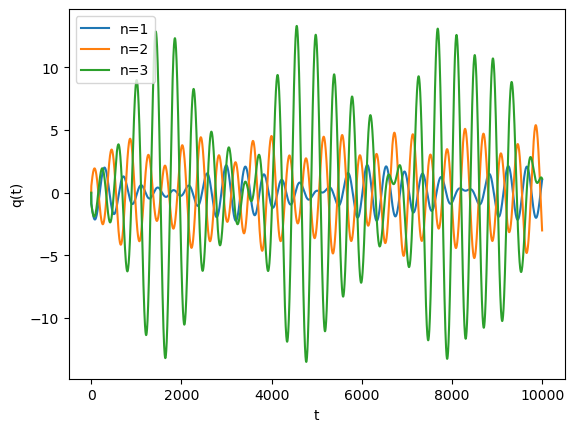

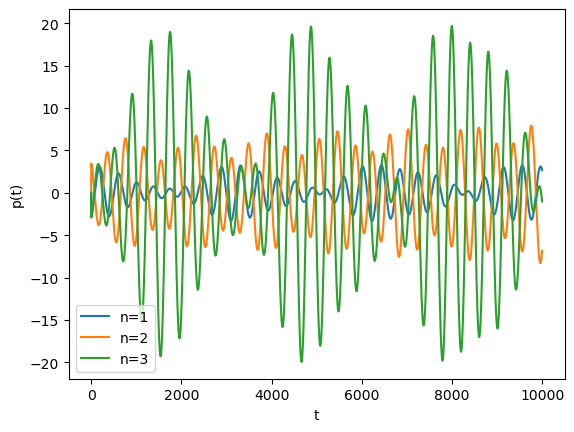

<Figure size 640x480 with 0 Axes>

In [21]:
## Using Runge Kutta 4 Method to integrate qdot and pdot

def rk4_evol(q,p):
    q_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's position
    p_matrix = np.zeros([N,M]) # every column j stores the time evolution of oscillator j's momentum
    for t in range(1,N):
        ## k_1
        k_1q = p
        k_1p = p_dot_update(q)
        q_tem = np.zeros(M) # Temporary q, p; to store the intermediate value for calculating k1,2,3,4
        p_tem = np.zeros(M)
        for n in range(M):
            q_tem[n] = k_1q[n]*dt/2 + q[n] 
            p_tem[n] = k_1p[n]*dt/2 + p[n]
            
            ## k_2
            k_2q = p_tem
            k_2p = p_dot_update(q_tem)
            q_tem[n] = k_2q[n]*dt/2 + q[n]
            p_tem[n] = k_2p[n]*dt/2 + p[n]
            
            ## k_3
            k_3q = p_tem
            k_3p = p_dot_update(q_tem)
            q_tem[n] = k_3q[n]*dt/2 + q[n]
            p_tem[n] = k_3p[n]*dt/2 + p[n]
        
            ## k_4
            k_4q = p_tem
            k_4p = p_dot_update(q_tem)
            q[n] = q[n] + 1/6*(k_1q[n]+2*k_2q[n]+2*k_3q[n]+k_4q[n])*dt
            p[n] = p[n] + 1/6*(k_1p[n]+2*k_2p[n]+2*k_3p[n]+k_4p[n])*dt
        q_matrix[t:]=q
        p_matrix[t:]=p
    return q_matrix, p_matrix

q_t, p_t = rk4_evol(q,p)

## Creating a label array for plotting
label_n = []
for i in range(M):
    label_n.append("n={number}".format(number=i+1))

q_plot = plt.plot(q_t)
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend(q_plot,label_n)
plt.figure()

p_plot = plt.plot(p_t)
plt.xlabel("t")
plt.ylabel("p(t)")
plt.legend(p_plot,label_n)
plt.figure()

<Figure size 640x480 with 0 Axes>

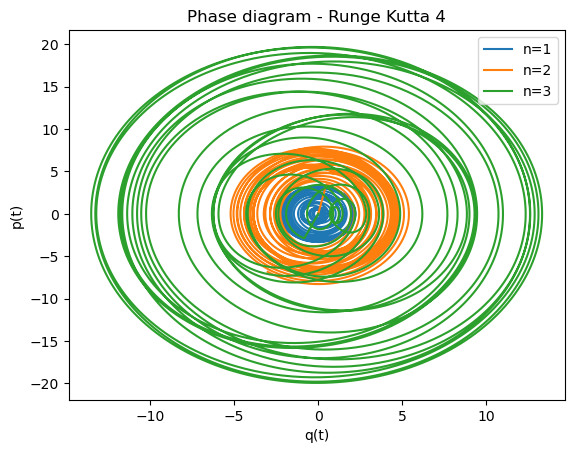

<Figure size 640x480 with 0 Axes>

In [22]:
## Phase diagram for Runge Kutta 4 (midpoint)
for n in range(M):
    label_n = "n={number}".format(number=n+1)
    plt.plot(q_t[:,n],p_t[:,n], label=label_n)
    
plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.title("Phase diagram - Runge Kutta 4")
plt.legend()
plt.figure()

## Comments (simple case)
#### From phase diagram
* Even using symplectic method, the phase diagram still converges, is this "tolerable"?
* Other possible solvers: **Verlet integrator/ Leapfrog integrator/ Forest-Ruth/ Yoshida integrator**
* n=4 case, euler's phase diagram "shrinks" to original point, while RK-4's "diverges"?
* Maybe we should also plot the energy evolution of the system.

## FPUT ($\alpha$ lattice)
The hamiltonian is given by:
\begin{equation}
H_\alpha(\vec{q},\vec{p})=\sum_{n=0}^{N-1}\Bigr[ \frac{p_n^2}{2}+k\frac{(q_{n+1}-q_n)^2}{2}+\frac{\alpha}{3}(q_{n+1}-q_{n})^3\Bigr]
\end{equation}